In [1]:
import numpy as np
import os
import glob

def load_path(phase, cls, les = None, data = 'sm', data_dir = '/mnt/disk2/data/private_data/SMhospital/capsule/1 preprocessed'):
    """
    phase = 'train', 'test'
    cls: [les]  
      'n': ['neg']
      'h': ['redspot', 'angio', 'active'], 
      'd': ['ero', 'ulc', 'str'],
      'p': ['amp', 'lym', 'tum']}
    """
    lesions = dict(neg = 'negative', 
                   redspot = 'red_spot', angio = 'angioectasia', active = 'active_bleeding', 
                   ero = 'erosion', ulcer = 'ulcer', str = 'stricture', 
                   amp = 'ampulla_of_vater', lym = 'lymphoid_follicles', tum = 'small_bowel_tumor')
    classes = dict(n = 'negative', h = 'hemorrhagic', d = 'depressed', p = 'protruded')

    path = os.path.join(data_dir, data, phase, classes[cls], lesions[les])
#     pathlist = glob.glob(path + '/*.jpg')
    pathlist = sorted(os.listdir(path))
    return np.asarray(pathlist)

In [2]:
data_dir = '/mnt/disk2/data/private_data/SMhospital/capsule/0 data/labeled'

neg1_path = load_path('p3_2', 'n', 'neg', data = '190520 p3_2', data_dir = data_dir)
neg2_path = load_path('raw', 'n', 'neg', data = '190814 negative', data_dir = data_dir)
redspot_path = load_path('p3_2', 'h', 'redspot', data = '190520 p3_2', data_dir = data_dir)
angio_path = load_path('p3_2', 'h', 'angio', data = '190520 p3_2', data_dir = data_dir)
active_path = load_path('p3_2', 'h', 'active', data = '190520 p3_2', data_dir = data_dir)
ero_path = load_path('p3_2', 'd', 'ero', data = '190520 p3_2', data_dir = data_dir)
ulcer_path = load_path('p3_2', 'd', 'ulcer', data = '190520 p3_2', data_dir = data_dir)
str_path = load_path('p3_2', 'd', 'str', data = '190520 p3_2', data_dir = data_dir)
amp_path = load_path('p3_2', 'p', 'amp', data = '190520 p3_2', data_dir = data_dir)
lym_path = load_path('p3_2', 'p', 'lym', data = '190520 p3_2', data_dir = data_dir)
tum_path = load_path('p3_2', 'p', 'tum', data = '190520 p3_2', data_dir = data_dir)


print("negative:",len(neg1_path), len(neg2_path))
print("red spot:",len(redspot_path))
print("angioectasia:",len(angio_path))
print("active_bleeding:",len(active_path))
print("erosion:",len(ero_path))
print("ulcer:",len(ulcer_path))
print("stricture:",len(str_path))
print("ampulla_of_vater:",len(amp_path))
print("lymphoid_follicles:",len(lym_path))
print("small_bowel_tumor:",len(tum_path))



original_size = [len(neg1_path) + len(neg2_path), len(redspot_path), len(angio_path), len(active_path), 
                 len(ero_path), len(ulcer_path), len(str_path), len(amp_path), len(lym_path), len(tum_path)]

print('')
print("negative: {}\nhemorrhagic: {}\ndepressed: {}\nprotruded: {}".format(original_size[0], np.sum(original_size[1:4]),
                                                                          np.sum(original_size[4:7]),
                                                                          np.sum(original_size[7:])))

negative: 2536 5270
red spot: 695
angioectasia: 23
active_bleeding: 536
erosion: 922
ulcer: 915
stricture: 129
ampulla_of_vater: 59
lymphoid_follicles: 446
small_bowel_tumor: 215

negative: 7806
hemorrhagic: 1254
depressed: 1966
protruded: 720


In [3]:
neg_path = np.hstack([neg1_path, neg2_path])

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame(columns = ['Type', 'Lesion', 'Findings'])

In [6]:
Type = ['negative', 'hemorrhagic', 'depressed', 'protruded']
Lesion = {'negative': '-', 
          'hemorrhagic': ['red spot', 'angioectasia', 'active bleeding'], 
          'depressed': ['erosion', 'ulcer', 'stricture'], 
          'protruded': ['ampulla of vater', 'lymphoid follicles', 'small bowel tumor']}

In [7]:
h_path = [redspot_path, angio_path, active_path]
d_path = [ero_path, ulcer_path, str_path]
p_path = [amp_path, lym_path, tum_path]

Path = [[neg_path], h_path, d_path, p_path]

for path, t in zip(Path, Type):
    lesion = Lesion[t]
    for p, l in zip(path, lesion):
        for finding in p:
            new_data = {'Type': t, 'Lesion': l, 'Findings': finding}
            df = df.append(new_data, ignore_index=True)
            
df

,Type,Lesion,Findings
0,negative,-,AJ___02-07-37___1015318.jpg
1,negative,-,AJ___02-07-38___1015319.jpg
2,negative,-,AJ___02-07-42___1015327.jpg
3,negative,-,AJ___02-08-16___1015395.jpg
4,negative,-,AJ___02-08-46___1015456.jpg
5,negative,-,AJ___02-09-44___1015572.jpg
6,negative,-,AJ___02-09-47___1015577.jpg
7,negative,-,AJ___02-09-48___1015579.jpg
8,negative,-,AJ___02-09-50___1015583.jpg
9,negative,-,AJ___02-09-56___1015595.jpg


In [8]:
df.to_csv('./Data_finding_list.csv',encoding='utf-8-sig', index = True)

In [10]:
df

,Type,Lesion,Findings


In [2]:
data_dir = '/mnt/disk2/data/private_data/SMhospital/capsule/0 data/labeled'

neg1_path = load_path('p3_2', 'n', 'neg', data = '190520 p3_2', data_dir = data_dir)
neg2_path = load_path('raw', 'n', 'neg', data = '190814 negative', data_dir = data_dir)
redspot_path = load_path('p3_2', 'h', 'redspot', data = '190520 p3_2', data_dir = data_dir)
angio_path = load_path('p3_2', 'h', 'angio', data = '190520 p3_2', data_dir = data_dir)
active_path = load_path('p3_2', 'h', 'active', data = '190520 p3_2', data_dir = data_dir)
ero_path = load_path('p3_2', 'd', 'ero', data = '190520 p3_2', data_dir = data_dir)
ulcer_path = load_path('p3_2', 'd', 'ulcer', data = '190520 p3_2', data_dir = data_dir)
str_path = load_path('p3_2', 'd', 'str', data = '190520 p3_2', data_dir = data_dir)
amp_path = load_path('p3_2', 'p', 'amp', data = '190520 p3_2', data_dir = data_dir)
lym_path = load_path('p3_2', 'p', 'lym', data = '190520 p3_2', data_dir = data_dir)
tum_path = load_path('p3_2', 'p', 'tum', data = '190520 p3_2', data_dir = data_dir)


print("negative:",len(neg1_path), len(neg2_path))
print("red spot:",len(redspot_path))
print("angioectasia:",len(angio_path))
print("active_bleeding:",len(active_path))
print("erosion:",len(ero_path))
print("ulcer:",len(ulcer_path))
print("stricture:",len(str_path))
print("ampulla_of_vater:",len(amp_path))
print("lymphoid_follicles:",len(lym_path))
print("small_bowel_tumor:",len(tum_path))



original_size = [len(neg1_path) + len(neg2_path), len(redspot_path), len(angio_path), len(active_path), 
                 len(ero_path), len(ulcer_path), len(str_path), len(amp_path), len(lym_path), len(tum_path)]

print('')
print("negative: {}\nhemorrhagic: {}\ndepressed: {}\nprotruded: {}".format(original_size[0], np.sum(original_size[1:4]),
                                                                          np.sum(original_size[4:7]),
                                                                          np.sum(original_size[7:])))

negative: 2536 5270
red spot: 695
angioectasia: 23
active_bleeding: 536
erosion: 922
ulcer: 915
stricture: 129
ampulla_of_vater: 59
lymphoid_follicles: 446
small_bowel_tumor: 215

negative: 7806
hemorrhagic: 1254
depressed: 1966
protruded: 720


In [3]:
neg1_path

array(['/mnt/disk2/data/private_data/SMhospital/capsule/0 data/labeled/190520 p3_2/p3_2/negative/negative/CW___02-49-14___1020312.jpg',
       '/mnt/disk2/data/private_data/SMhospital/capsule/0 data/labeled/190520 p3_2/p3_2/negative/negative/AJ___02-07-37___1015318.jpg',
       '/mnt/disk2/data/private_data/SMhospital/capsule/0 data/labeled/190520 p3_2/p3_2/negative/negative/CW___02-48-48___1020261.jpg',
       ...,
       '/mnt/disk2/data/private_data/SMhospital/capsule/0 data/labeled/190520 p3_2/p3_2/negative/negative/희신___01-54-34___2024994.jpg',
       '/mnt/disk2/data/private_data/SMhospital/capsule/0 data/labeled/190520 p3_2/p3_2/negative/negative/희신___02-11-53___2027124.jpg',
       '/mnt/disk2/data/private_data/SMhospital/capsule/0 data/labeled/190520 p3_2/p3_2/negative/negative/희신___02-50-38___2032837.jpg'],
      dtype='<U171')

In [2]:
data_dir = '/mnt/disk2/data/private_data/SMhospital/capsule/0 data/labeled'

neg_1_path = load_path('p3_2', 'n', 'neg', data = '190520 p3_2', data_dir = data_dir)
neg_2_path = load_path('raw', 'n', 'neg', data = '190814 negative', data_dir = data_dir)

In [ ]:
neg_overlapped = np.intersect1d(neg_1_path, neg_2_path)

In [2]:
neg_path = load_path('train', 'n', 'neg', data = 'sm')
redspot_path = load_path('train', 'h', 'redspot', data = 'sm')
angio_path = load_path('train', 'h', 'angio', data = 'sm')
active_path = load_path('train', 'h', 'active', data = 'sm')
ero_path = load_path('train', 'd', 'ero', data = 'sm')
ulcer_path = load_path('train', 'd', 'ulcer', data = 'sm')
str_path = load_path('train', 'd', 'str', data = 'sm')

print("negative:",neg_path.shape)
print("red spot:",redspot_path.shape)
print("angioectasia:",angio_path.shape)
print("active_bleeding:",active_path.shape)
print("erosion:",ero_path.shape)
print("ulcer:",ulcer_path.shape)
print("stricture:",str_path.shape)

sm_train_size = [len(neg_path), len(redspot_path), len(angio_path), len(active_path), len(ero_path), len(ulcer_path), len(str_path)]

negative: (49999,)
red spot: (4448,)
angioectasia: (147,)
active_bleeding: (3430,)
erosion: (5900,)
ulcer: (5856,)
stricture: (825,)


In [3]:
neg_path = load_path('test', 'n', 'neg', data = 'sm')
redspot_path = load_path('test', 'h', 'redspot', data = 'sm')
angio_path = load_path('test', 'h', 'angio', data = 'sm')
active_path = load_path('test', 'h', 'active', data = 'sm')
ero_path = load_path('test', 'd', 'ero', data = 'sm')
ulcer_path = load_path('test', 'd', 'ulcer', data = 'sm')
str_path = load_path('test', 'd', 'str', data = 'sm')

print("negative:",neg_path.shape)
print("red spot:",redspot_path.shape)
print("angioectasia:",angio_path.shape)
print("active_bleeding:",active_path.shape)
print("erosion:",ero_path.shape)
print("ulcer:",ulcer_path.shape)
print("stricture:",str_path.shape)

sm_test_size = [len(neg_path), len(redspot_path), len(angio_path), len(active_path), len(ero_path), len(ulcer_path), len(str_path)]

negative: (12449,)
red spot: (1112,)
angioectasia: (37,)
active_bleeding: (858,)
erosion: (1476,)
ulcer: (1464,)
stricture: (207,)


In [6]:
import matplotlib.pyplot as plt
import cv2

In [8]:
plt.subplots?

In [12]:
axes[]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72383f4d30>,
      dtype=object)

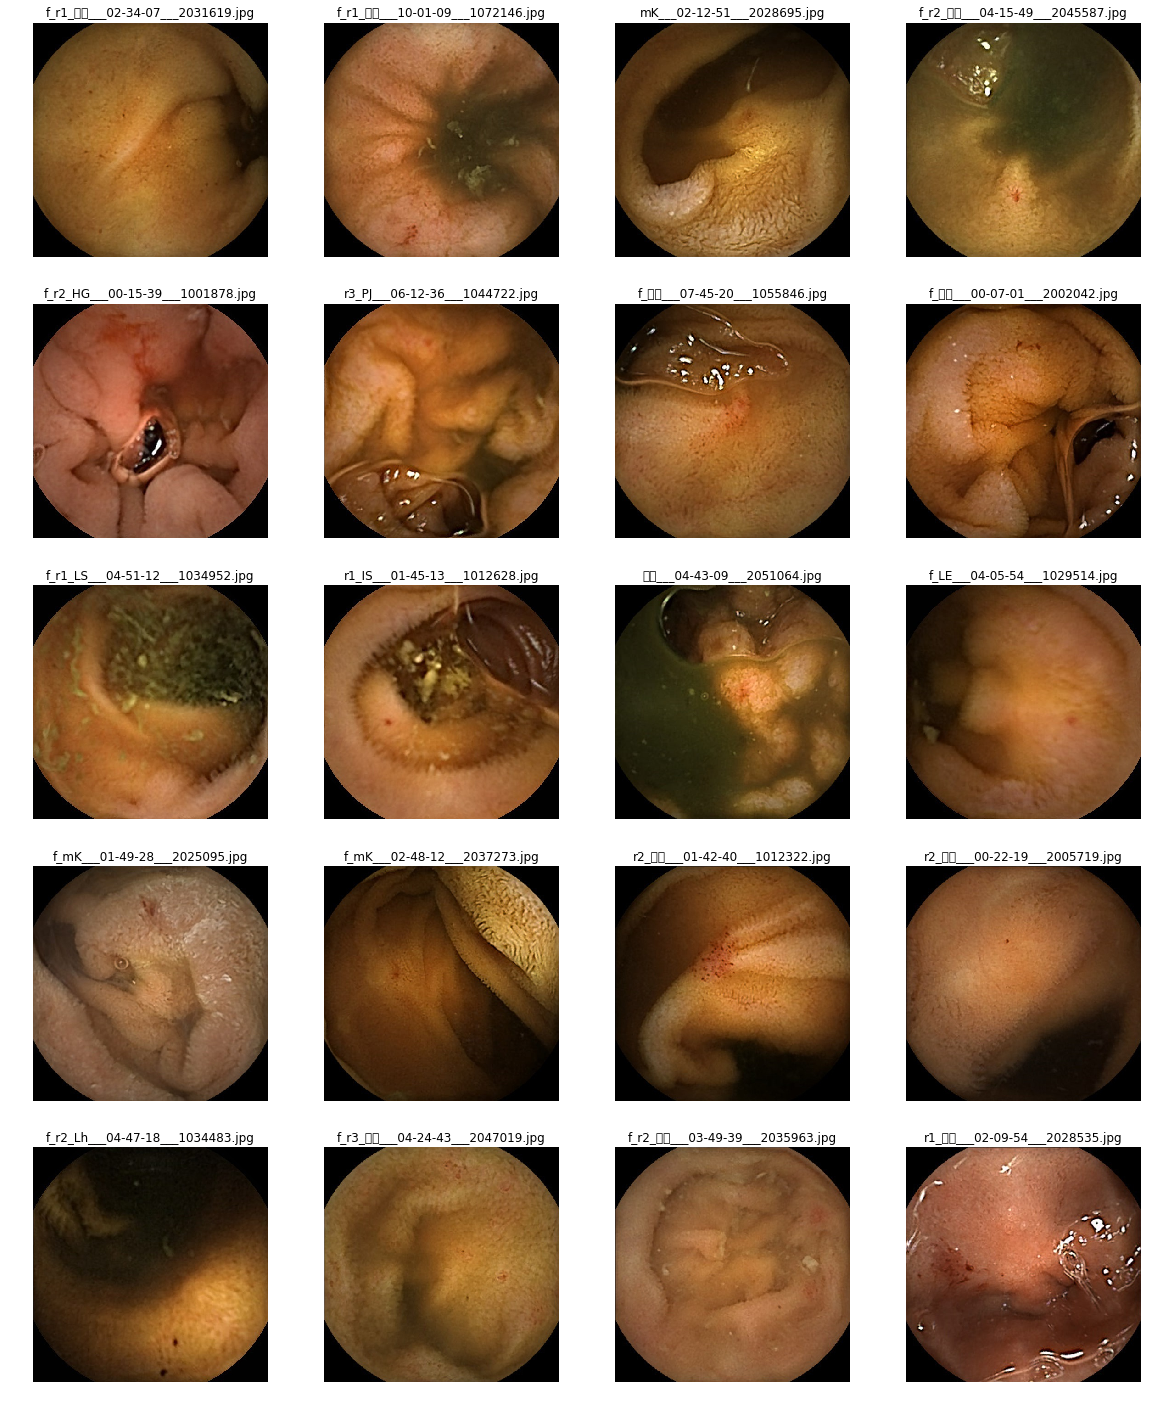

In [36]:
ran_idx = np.random.choice(len(redspot_path), 20, replace = False)
fig, axes = plt.subplots(nrows=5, ncols=4, figsize = (20, 25))
for i, idx in enumerate(ran_idx):
    img = cv2.imread(redspot_path[idx])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    axes[i//4, i%4].imshow(img)
    axes[i//4, i%4].axis('off')
    axes[i//4, i%4].set_title(os.path.basename(redspot_path[idx]))
fig.show()

In [37]:
neg_path = load_path('train', 'n', 'neg', data = 'sm_v2')
redspot_path = load_path('train', 'h', 'redspot', data = 'sm_v2')
angio_path = load_path('train', 'h', 'angio', data = 'sm_v2')
active_path = load_path('train', 'h', 'active', data = 'sm_v2')
ero_path = load_path('train', 'd', 'ero', data = 'sm_v2')
ulcer_path = load_path('train', 'd', 'ulcer', data = 'sm_v2')
str_path = load_path('train', 'd', 'str', data = 'sm_v2')

print("negative:",neg_path.shape)
print("red spot:",redspot_path.shape)
print("angioectasia:",angio_path.shape)
print("active_bleeding:",active_path.shape)
print("erosion:",ero_path.shape)
print("ulcer:",ulcer_path.shape)
print("stricture:",str_path.shape)

sm_v2_train_size = [len(neg_path), len(redspot_path), len(angio_path), len(active_path), len(ero_path), len(ulcer_path), len(str_path)]

negative: (49960,)
red spot: (4448,)
angioectasia: (144,)
active_bleeding: (3424,)
erosion: (5896,)
ulcer: (5856,)
stricture: (824,)


In [41]:
neg_path = load_path('test', 'n', 'neg', data = 'sm_v2')
redspot_path = load_path('test', 'h', 'redspot', data = 'sm_v2')
angio_path = load_path('test', 'h', 'angio', data = 'sm_v2')
active_path = load_path('test', 'h', 'active', data = 'sm_v2')
ero_path = load_path('test', 'd', 'ero', data = 'sm_v2')
ulcer_path = load_path('test', 'd', 'ulcer', data = 'sm_v2')
str_path = load_path('test', 'd', 'str', data = 'sm_v2')

print("negative:",neg_path.shape)
print("red spot:",redspot_path.shape)
print("angioectasia:",angio_path.shape)
print("active_bleeding:",active_path.shape)
print("erosion:",ero_path.shape)
print("ulcer:",ulcer_path.shape)
print("stricture:",str_path.shape)

sm_v2_test_size = [len(neg_path), len(redspot_path), len(angio_path), len(active_path), len(ero_path), len(ulcer_path), len(str_path)]

negative: (10927,)
red spot: (973,)
angioectasia: (35,)
active_bleeding: (756,)
erosion: (1295,)
ulcer: (1281,)
stricture: (182,)


In [42]:
sm_train_size = np.asarray(sm_train_size)
sm_test_size = np.asarray(sm_test_size)
sm_v2_train_size = np.asarray(sm_v2_train_size)
sm_v2_test_size = np.asarray(sm_v2_test_size)

In [43]:
sm_train_size + sm_test_size

array([62448,  5560,   184,  4288,  7376,  7320,  1032])

In [44]:
sm_v2_train_size + sm_v2_test_size

array([60887,  5421,   179,  4180,  7191,  7137,  1006])

In [45]:
data_dir = '/mnt/disk2/data/private_data/SMhospital/capsule/0 data/labeled'

neg1_path = load_path('p3_2', 'n', 'neg', data = '190520 p3_2', data_dir = data_dir)
neg2_path = load_path('raw', 'n', 'neg', data = '190814 negative', data_dir = data_dir)
redspot_path = load_path('p3_2', 'h', 'redspot', data = '190520 p3_2', data_dir = data_dir)
angio_path = load_path('p3_2', 'h', 'angio', data = '190520 p3_2', data_dir = data_dir)
active_path = load_path('p3_2', 'h', 'active', data = '190520 p3_2', data_dir = data_dir)
ero_path = load_path('p3_2', 'd', 'ero', data = '190520 p3_2', data_dir = data_dir)
ulcer_path = load_path('p3_2', 'd', 'ulcer', data = '190520 p3_2', data_dir = data_dir)
str_path = load_path('p3_2', 'd', 'str', data = '190520 p3_2', data_dir = data_dir)

print("negative:",neg1_path.shape, neg2_path.shape, len(neg1_path) + len(neg2_path))
print("red spot:",redspot_path.shape)
print("angioectasia:",angio_path.shape)
print("active_bleeding:",active_path.shape)
print("erosion:",ero_path.shape)
print("ulcer:",ulcer_path.shape)
print("stricture:",str_path.shape)

original_size = [len(neg1_path) + len(neg2_path), len(redspot_path), len(angio_path), len(active_path), len(ero_path), len(ulcer_path), len(str_path)]

negative: (2536,) (5270,) 7806
red spot: (695,)
angioectasia: (23,)
active_bleeding: (536,)
erosion: (922,)
ulcer: (915,)
stricture: (129,)


In [46]:
original_size = np.asarray(original_size)

8*original_size

array([62448,  5560,   184,  4288,  7376,  7320,  1032])

In [47]:
sm_train_size + sm_test_size

array([62448,  5560,   184,  4288,  7376,  7320,  1032])

In [48]:
sm_v2_train_size + sm_v2_test_size

array([60887,  5421,   179,  4180,  7191,  7137,  1006])